# 1. Carga de bibliotetas

Seccion para instalar e importar bibliotecas necesarias

In [80]:
# Acá instalamos la biblioteca fitter para el ajuste de funciones
!pip install fitter

In [81]:
# Acá importarmos todas las bibliotecas necesarias: Pandas, Numpy, Scipy y Fitter
from fitter import Fitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [82]:
# Esto se hace para montar el gogle drive y poder acceder datos alojados allí.
# from google.colab import drive
# drive.mount('/content/drive')

# 2. Carga de datos

Utilizaremos los datos de recorrido de bicicletas públicas de la ciudad de Buenos Aires
https://data.buenosaires.gob.ar/dataset/bicicletas-publicas

Bajaremos el archivo "Recorridos Realizados 2023 (ZIP)", descomprimiremos el archivo csv presente ("trips_2023.csv")y lo alojamos dentro de la carpeta "Colab Notebooks" de nuestro Google Drive




In [83]:
# En esta parte del código se debe modificar la ubicación correcta del google drive
# bicis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EPIO/Datos/trips_2023.csv')
productos = pd.read_csv('./Fecom_Inc_Products.csv', sep=';')

# 3. Análisis Exploratorio de Datos

In [84]:
# Corroboramos que el tipo de dato de la variable "bicis" es un dataframe
type(productos)

pandas.core.frame.DataFrame

In [85]:
# Primeras lineas de nuestro dataframe
productos.head()

,Product_ID,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,625.0,20.0,17.0,13.0


In [86]:
# Si solo quiero los nombres de las columnas en formato lista
productos.columns

Index(['Product_ID', 'Product_Category_Name', 'Product_Weight_Gr',
       'Product_Length_Cm', 'Product_Height_Cm', 'Product_Width_Cm'],
      dtype='object')

In [87]:
# Dimensionalidad del dataframe
productos.shape

(32951, 6)

In [88]:
# El tipo de dato de cada una de las columnas
# Acá veo que 'duracion_recorrido', 'fecha_origen_recorrido' y 'fecha_destino_recorrido'
# son de tipo object (texto) y no está bueno eso
productos.dtypes

Product_ID                object
Product_Category_Name     object
Product_Weight_Gr        float64
Product_Length_Cm        float64
Product_Height_Cm        float64
Product_Width_Cm         float64
dtype: object

In [89]:
# Para acceder a una columna específica puedo usar el operador punto:
productos.Product_Width_Cm

0        14.0
1        20.0
2        15.0
3        26.0
4        13.0
         ... 
32946    40.0
32947    16.0
32948    27.0
32949    20.0
32950     7.0
Name: Product_Width_Cm, Length: 32951, dtype: float64

In [90]:
# O el operador corchete:
productos['Product_Width_Cm']

0        14.0
1        20.0
2        15.0
3        26.0
4        13.0
         ... 
32946    40.0
32947    16.0
32948    27.0
32949    20.0
32950     7.0
Name: Product_Width_Cm, Length: 32951, dtype: float64

# 5. Cálculo de FDPS

In [91]:
# En una variable preparar la columna del df que quiero ajustar
# fdp_constitucion_hora = Fitter(productos.Product_Width_Cm)
# Filtrar a algunas distribuciones típicas (cambiá esta lista según lo que necesites)
# fdp_constitucion_hora = Fitter(productos['Product_Width_Cm'],
        #    distributions=['norm', 'expon', 'gamma', 'lognorm', 'uniform'])
fdp_constitucion_hora = Fitter(productos['Product_Width_Cm'].dropna().values)  # segundos
# fdp_constitucion_hora.fit()
# fdp_constitucion_hora.summary()


In [92]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_constitucion_hora.fit()

2025-04-30 04:05:52.544 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2025-04-30 04:05:52.664 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.041718)
2025-04-30 04:05:52.719 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted arcsine distribution with error=0.045844)
2025-04-30 04:05:52.832 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=0.020942)
2025-04-30 04:05:52.883 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted bradford distribution with error=0.03522)
2025-04-30 04:05:52.888 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted argus distribution with error=0.044967)
2025-04-30 04:05:52.988 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.024935)
2025-04-30 04:05:53.055 | INFO     | fitter.fitter:_fit_single_distribution:333 - 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace_asymmetric,0.017600,1446.902009,1472.110157,inf,0.098471,1.464861e-278
exponnorm,0.018028,1492.284674,1517.492822,inf,0.074535,1.230346e-159
weibull_min,0.018035,inf,inf,inf,0.063215,6.517661e-115
skewcauchy,0.018689,1239.888799,1265.096947,inf,0.111234,0.000000e+00
johnsonsu,0.019766,1310.393606,1344.004471,inf,0.074255,1.941191e-158
norminvgauss,0.019819,1351.988018,1385.598883,inf,0.070000,7.869319e-141
powerlognorm,0.019927,1365.670966,1399.281831,inf,0.070281,5.801308e-142
geninvgauss,0.020172,1361.322254,1394.933119,inf,0.071267,5.756553e-146
invgauss,0.020253,1376.612517,1401.820666,inf,0.075607,2.972893e-164
skewnorm,0.020317,1937.718826,1962.926974,inf,0.151831,0.000000e+00


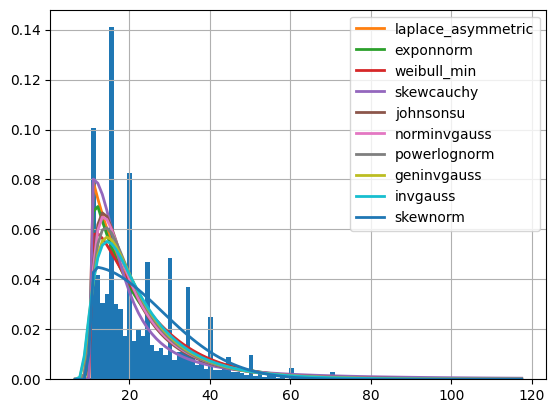

In [93]:
# Summary me muestra el resumen de los mejores ajustes
fdp_constitucion_hora.summary(10)

# 6. Simulacion

In [94]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_constitucion_hora.get_best(method='sumsquare_error')

{'laplace_asymmetric': {'kappa': 0.1274280356430184,
  'loc': 11.000000000003787,
  'scale': 1.5798490704461043}}

In [95]:
fdp_constitucion_hora.get_best(method='ks_statistic')

{'weibull_min': {'c': 1.1048044443877316,
  'loc': 9.998618246946357,
  'scale': 13.712298480670839}}

In [96]:
# Para simular, guardo los valores de los parámetros en 4 variables
dfn = 10.210149046195188
dfd = 24.449261873976212
loc = -0.210629715477468
scale =  15.900756775955681

In [97]:
# Gracias al método rvs del módulo stats de Scipy, puedo generar datos
# con los parámetros que me dio Fitter
fdp_f = stats.f.rvs(dfn, dfd, loc=loc, scale=scale, size=35000)

In [98]:
# Esta variable es un array de Numpy con valores similares a mis datos de origen
fdp_f

array([11.58293159, 24.10440898, 26.46329338, ...,  6.8571842 ,
       18.31153428, 14.20344816])

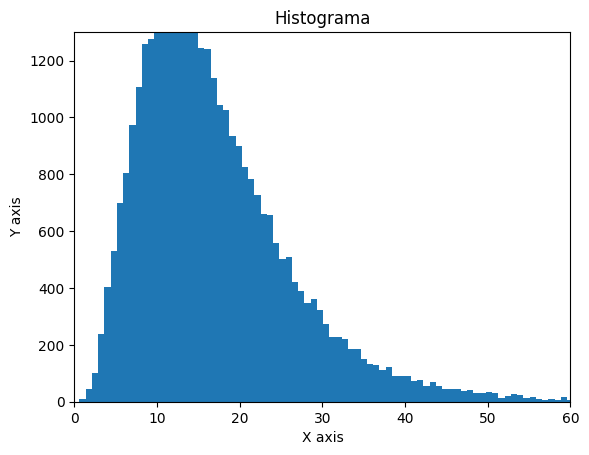

In [99]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 60)
plt.ylim(0, 1300)
plt.hist(fdp_f, bins=150)
plt.show()